In [2]:
import pandas as pd
import json

import numpy as np
import matplotlib.pyplot as plt

import pickle 
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
sns.set_style("darkgrid")
from copy import deepcopy
%pylab inline

%matplotlib inline

/Users/sdutta/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [312]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 40)
pd.set_option('display.precision', 3)

In [4]:
df = pd.read_csv('../Data/train.csv')

## Original Training Data

In [5]:
df

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.054e+10,1,SHOES,8931.0
2,30,7,Friday,7.411e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.007e+09,2,PAINT AND ACCESSORIES,1017.0
5,26,8,Friday,2.007e+09,2,PAINT AND ACCESSORIES,1017.0
6,26,8,Friday,2.007e+09,1,PAINT AND ACCESSORIES,1017.0
7,26,8,Friday,7.005e+09,1,PAINT AND ACCESSORIES,2802.0
8,26,8,Friday,2.238e+09,1,PAINT AND ACCESSORIES,4501.0
9,26,8,Friday,2.238e+09,-1,PAINT AND ACCESSORIES,3565.0


In [6]:
df.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,647054.000,647054.000,6.429e+05,647054.000,642925.000
mean,58.585,96167.640,3.061e+10,1.109,3726.885
std,157.636,55545.485,9.120e+10,0.701,2780.966
min,3.000,5.000,8.340e+02,-12.000,0.000
25%,27.000,49268.000,3.400e+09,1.000,1404.000
50%,39.000,97074.000,7.050e+09,1.000,3352.000
75%,40.000,144316.000,3.007e+10,1.000,5501.000
max,999.000,191347.000,9.790e+11,71.000,9998.000


In [7]:
len(df[(df['FinelineNumber'].isnull())] ) 

4129

In [8]:
df.loc[(df['FinelineNumber'].isnull()) & (df['Upc'].isnull()), :]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN
1134,999,484,Friday,NaN,-2,NaN,NaN
1135,999,484,Friday,NaN,-2,NaN,NaN
1155,44,496,Friday,NaN,1,PHARMACY RX,NaN
1216,5,521,Friday,NaN,1,PHARMACY RX,NaN
1373,5,585,Friday,NaN,1,PHARMACY RX,NaN


##### The same rows have both Upc and FinelineNumber missing  as excatly 4129 values are null in both columns and also for the same rows

In [9]:
len(df.loc[(df['FinelineNumber'].isnull()) & (df['Upc'].isnull()), :])

4129

##### 1361 rows have null in all 3 fields below ---> probably drop these

In [10]:
len(df.loc[(df['FinelineNumber'].isnull()) & (df['Upc'].isnull())& (df['DepartmentDescription'].isnull()), :])

1361

#### Looking at the rows where DepartmentDescription is not null but Upc and Fineline are null

In [11]:
len(df.loc[(df['FinelineNumber'].isnull()) & (df['Upc'].isnull())& (df['DepartmentDescription'].notnull()), :])

2768

In [12]:
mask = df['FinelineNumber'].isnull() & df['Upc'].isnull() & df['DepartmentDescription'].notnull()

In [13]:
df[mask].head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
1155,44,496,Friday,NaN,1,PHARMACY RX,NaN
1216,5,521,Friday,NaN,1,PHARMACY RX,NaN
1373,5,585,Friday,NaN,1,PHARMACY RX,NaN
1455,5,619,Friday,NaN,1,PHARMACY RX,NaN
1456,5,619,Friday,NaN,1,PHARMACY RX,NaN


#### All of the 2768 rows are for PHARMACY RX ---> so the Upc and FinelineNumbers are null

In [14]:
df[mask].DepartmentDescription.unique()

array(['PHARMACY RX'], dtype=object)

In [15]:
mask2 = (df['DepartmentDescription'] == 'PHARMACY RX')

## Not all PHARMA Category rows have null Upc and FinelineNumbers

#### There are 23 Upcs that are present within PHARMACY RX ...so some products under this category do have Upcs

In [16]:
df[mask2].Upc.nunique() 

24

In [17]:
df[mask2].Upc.unique() 

array([             nan,   3.01691834e+10,   3.01691833e+10,
         3.01691837e+10,   6.81306047e+10,   6.81131312e+10,
         6.81131312e+10,   6.81131312e+10,   3.82904911e+10,
         6.81131312e+10,   6.81131312e+10,   6.81131312e+10,
         6.81131312e+10,   6.81131312e+10,   6.05511296e+10,
         6.81131312e+10,   6.81131312e+10,   6.81131312e+10,
         6.81131312e+10,   6.81131176e+10,   6.81131312e+10,
         3.82903249e+10,   6.81131312e+10,   3.82903201e+10,
         6.81131312e+10])

#### There are 3 FinelineNumbers that are present within PHARMACY RX ...so some subcategories do exist

In [18]:
df[mask2].FinelineNumber.nunique() 

4

In [19]:
df[mask2].FinelineNumber.unique() 

array([   nan,  4822.,  1335.,  5615.,  1336.])

### Drop all rows where all 3 columns -- Upc, FinelineNumber and DepartmentDescription are Null - 1361 rows

In [20]:
mask3 = df['FinelineNumber'].isnull() & df['Upc'].isnull() & df['DepartmentDescription'].isnull()

In [21]:
df[mask3].count()

TripType                 1361
VisitNumber              1361
Weekday                  1361
Upc                         0
ScanCount                1361
DepartmentDescription       0
FinelineNumber              0
dtype: int64

In [22]:
df[mask3].DepartmentDescription.unique()

array([nan], dtype=object)

In [23]:
NotAll3Null_Df = df[~mask3]

In [24]:
NotAll3Null_Df.count()

TripType                 645693
VisitNumber              645693
Weekday                  645693
Upc                      642925
ScanCount                645693
DepartmentDescription    645693
FinelineNumber           642925
dtype: int64

In [25]:
647054-1361

645693

#### Replacing NaNs in UPC and FinelineNumber  with PharmaMis 
-As seen above all 2768 NaNs in UPC and FinelineNumbers have DepartmentDescription as PHARMACY RX
-This will take care of all the NaNs 

In [26]:
FullDF = NotAll3Null_Df.filter(['TripType','VisitNumber', 'Weekday', 'ScanCount',\
                                'DepartmentDescription','FinelineNumber','Upc'])

In [27]:
mask5 = FullDF['FinelineNumber'].isnull() & FullDF['Upc'].isnull() & FullDF['DepartmentDescription'].notnull()

In [28]:
print( FullDF[mask5].DepartmentDescription.unique(), FullDF[mask5].Upc.unique(), FullDF[mask5].FinelineNumber.unique())

['PHARMACY RX'] [ nan] [ nan]


In [29]:
FullDF.Upc.fillna('PharmaMis',inplace=True) 

In [30]:
FullDF.FinelineNumber.fillna('PharmaMis',inplace=True)

In [31]:
print( FullDF[mask5].DepartmentDescription.unique(), FullDF[mask5].Upc.unique(), FullDF[mask5].FinelineNumber.unique())

['PHARMACY RX'] ['PharmaMis'] ['PharmaMis']


In [32]:
FullDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645693 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 645693 non-null int64
VisitNumber              645693 non-null int64
Weekday                  645693 non-null object
ScanCount                645693 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           645693 non-null object
Upc                      645693 non-null object
dtypes: int64(3), object(4)
memory usage: 39.4+ MB


# * Creat the full dataframe with all features with all the steps below in a new notebook - FullDataFrame*

 ## Dropping Upc and FinelineNumber --- First MVP

In [33]:
NotAll3Null_Df.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

In [34]:
FirstDF = NotAll3Null_Df.filter(['TripType','VisitNumber', 'Weekday', 'ScanCount', 'DepartmentDescription'])

In [35]:
FirstDF.head()

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription
0,999,5,Friday,-1,FINANCIAL SERVICES
1,30,7,Friday,1,SHOES
2,30,7,Friday,1,PERSONAL CARE
3,26,8,Friday,2,PAINT AND ACCESSORIES
4,26,8,Friday,2,PAINT AND ACCESSORIES


# Making a tripwise DF

## Making Each DepartmentDescription into a column 
For each visit/trip fill Department columns with the no. of items bought from that dept. 

In [36]:
FirstDF.DepartmentDescription.nunique()

68

In [37]:
SecondDf = FirstDF.filter(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'])

In [38]:
SecondDf

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription
0,999,5,Friday,-1,FINANCIAL SERVICES
1,30,7,Friday,1,SHOES
2,30,7,Friday,1,PERSONAL CARE
3,26,8,Friday,2,PAINT AND ACCESSORIES
4,26,8,Friday,2,PAINT AND ACCESSORIES
5,26,8,Friday,2,PAINT AND ACCESSORIES
6,26,8,Friday,1,PAINT AND ACCESSORIES
7,26,8,Friday,1,PAINT AND ACCESSORIES
8,26,8,Friday,1,PAINT AND ACCESSORIES
9,26,8,Friday,-1,PAINT AND ACCESSORIES


### Counting the no. of itmes bought in each department in each trip

In [39]:
SecondDf.loc[SecondDf['VisitNumber'] == 191324]  # To check each trip invidually

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription
646919,40,191324,Sunday,1,DAIRY
646920,40,191324,Sunday,1,PERSONAL CARE
646921,40,191324,Sunday,1,BEAUTY
646922,40,191324,Sunday,1,SHOES
646923,40,191324,Sunday,1,PRODUCE
646924,40,191324,Sunday,1,DAIRY
646925,40,191324,Sunday,1,DAIRY
646926,40,191324,Sunday,1,DSD GROCERY
646927,40,191324,Sunday,1,BAKERY
646928,40,191324,Sunday,1,DSD GROCERY


In [32]:
SecondDf.groupby(['VisitNumber','DepartmentDescription']).ScanCount.sum().reset_index()

,VisitNumber,DepartmentDescription,ScanCount
0,5,FINANCIAL SERVICES,-1
1,7,PERSONAL CARE,1
2,7,SHOES,1
3,8,DAIRY,2
4,8,DSD GROCERY,1
5,8,HOUSEHOLD CHEMICALS/SUPP,1
6,8,MEAT - FRESH & FROZEN,1
7,8,PAINT AND ACCESSORIES,18
8,8,PETS AND SUPPLIES,4
9,9,IMPULSE MERCHANDISE,1


In [40]:
CountCat = SecondDf.groupby(['VisitNumber','DepartmentDescription']).ScanCount.sum().reset_index()
CountCat.head()

,VisitNumber,DepartmentDescription,ScanCount
0,5,FINANCIAL SERVICES,-1
1,7,PERSONAL CARE,1
2,7,SHOES,1
3,8,DAIRY,2
4,8,DSD GROCERY,1


In [41]:
x = CountCat.duplicated()

In [42]:
for i in x:
    if i == True:
        print('Y')

### Creating a pivot table where the diff Depts in the Dept Col from above DF  become columns 
And for each visit, the no. of products bought from each Dept is entered in the corresponding newly created Dept column 

In [43]:
Count_pivot = CountCat.pivot(index='VisitNumber' , columns='DepartmentDescription' , values='ScanCount')

In [44]:
Count_pivot

DepartmentDescription,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",...,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Creating a DF out of the Pivot table

In [137]:
CategoryCountDF = pd.DataFrame(Count_pivot.to_records())

In [138]:
CategoryCountDF

,VisitNumber,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,...,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
7,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Filling all NaN with 0**

In [139]:
CategoryCountDF.fillna(0,inplace=True)

In [140]:
CategoryCountDF

,VisitNumber,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,...,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Check: If all Departments/categories were captured through the pivot  = 68

In [141]:
len(CategoryCountDF.columns)   ## This contains 68 categories/Depts + 1 column for VisitNumber

69

In [142]:
CountCat['DepartmentDescription'].nunique()

68

## Total no. of visits/Trips in the DF 

In [143]:
len(CategoryCountDF)

95516

#### Adding column for Total No. of products bought on the trip

In [144]:
CategoryCountDF.columns

Index(['VisitNumber', '1-HR PHOTO', 'ACCESSORIES', 'AUTOMOTIVE', 'BAKERY',
       'BATH AND SHOWER', 'BEAUTY', 'BEDDING', 'BOOKS AND MAGAZINES',
       'BOYS WEAR', 'BRAS & SHAPEWEAR', 'CAMERAS AND SUPPLIES',
       'CANDY, TOBACCO, COOKIES', 'CELEBRATION', 'COMM BREAD',
       'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', '

In [145]:
CategoryCountDF['TotProdts'] = 0

In [147]:
CategoryCountDF.columns[69]

'TotProdts'

In [148]:
for index, row in CategoryCountDF.iterrows():
    count = 0
    for col in row[1:69]:
        if col > 0:
            count += col
    CategoryCountDF.iloc[index, 69] = count

In [149]:
CategoryCountDF.tail()

,VisitNumber,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,...,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,TotProdts
95511,191343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
95512,191344,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
95513,191345,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
95514,191346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
95515,191347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


#### Check with original data and differnet Visit Numbers

In [150]:
CategoryCountDF.loc[CategoryCountDF['VisitNumber'] == 191344].TotProdts

95512    5.0
Name: TotProdts, dtype: float64

In [151]:
SecondDf.loc[SecondDf['VisitNumber'] == 191344].ScanCount.sum()

5

#### Make a column for no. of Categories shopped from in each visit

In [152]:
CategoryCountDF['CatBought'] = 0

In [153]:
for index, row in CategoryCountDF.iterrows():
    count = 0
    for col in row[1:69]:
        if col > 0:
            count += 1
    CategoryCountDF.iloc[index, 70] = count

In [154]:
CategoryCountDF.head()

,VisitNumber,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,TotProdts,CatBought
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2
2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,6
3,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2
4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2


#### Checking the no. of Categories bought with the no. of categories with  non zero values in every row

In [155]:
CategoryCountDF.iloc[95514,1:69].value_counts()

0.0    60
2.0     3
1.0     3
5.0     1
3.0     1
Name: 95514, dtype: int64

## Adding columns 'Weekday', 'TripType' from original DF to CategoryCountDF above

In [156]:
ThirdDf = FirstDF.filter(['TripType', 'VisitNumber', 'Weekday'])

In [157]:
ThirdDf.head(10)

,TripType,VisitNumber,Weekday
0,999,5,Friday
1,30,7,Friday
2,30,7,Friday
3,26,8,Friday
4,26,8,Friday
5,26,8,Friday
6,26,8,Friday
7,26,8,Friday
8,26,8,Friday
9,26,8,Friday


#### Removing duplicates from the above DF

In [158]:
y = ThirdDf.duplicated()

### Checking the no. of duplicates visits and unique visits --- unique visits matches with CategoryDF

In [159]:
count = 0 
for i in y:
    if i == True:
        count+=1
        
print('Total initial rows in data:',len(ThirdDf),'\nDuplicate rows:',count, '\nActual Visits:',len(ThirdDf)-count)

Total initial rows in data: 645693 
Duplicate rows: 550177 
Actual Visits: 95516


### Droping Duplicate Rows

In [160]:
ThirdDf.drop_duplicates(inplace = True)

In [161]:
ThirdDf.head(10)

,TripType,VisitNumber,Weekday
0,999,5,Friday
1,30,7,Friday
3,26,8,Friday
26,8,9,Friday
29,8,10,Friday
32,35,11,Friday
36,41,12,Friday
43,21,15,Friday
51,6,17,Friday
55,42,19,Friday


In [162]:
z = ThirdDf.duplicated()

In [163]:
count = 0 
for i in z:
    if i == True:
        count+=1
        
print('Total initial rows in data:',len(ThirdDf),'\nDuplicate rows:',count, '\nActual Visits:',len(ThirdDf)-count)

Total initial rows in data: 95516 
Duplicate rows: 0 
Actual Visits: 95516


#### Adding Dummy variables for weekdays

In [164]:
list(ThirdDf['Weekday'].unique())

['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']

In [165]:
ThirdDf.Weekday.value_counts()

Sunday       17086
Saturday     16881
Friday       15201
Monday       12006
Wednesday    11594
Tuesday      11518
Thursday     11230
Name: Weekday, dtype: int64

In [166]:
ThirdDf['Sunday'] =  np.where(ThirdDf['Weekday'] == 'Sunday', 1.0, 0.0)
ThirdDf['Saturday'] =  np.where(ThirdDf['Weekday'] == 'Saturday', 1.0, 0.0)
ThirdDf['Friday'] =  np.where(ThirdDf['Weekday'] == 'Friday', 1.0, 0.0)
ThirdDf['Thursday'] =  np.where(ThirdDf['Weekday'] == 'Thursday', 1.0, 0.0)
ThirdDf['Wednesday'] =  np.where(ThirdDf['Weekday'] == 'Wednesday', 1.0, 0.0)
ThirdDf['Tuesday'] =  np.where(ThirdDf['Weekday'] == 'Tuesday', 1.0, 0.0)
ThirdDf['Monday'] =  np.where(ThirdDf['Weekday'] == 'Monday', 1.0, 0.0)

#### Check dummy variable for each weekday

In [167]:
ThirdDf[ThirdDf['Weekday']=='Saturday'].head(5)

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
19949,24,6216,Saturday,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19952,36,6217,Saturday,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19956,37,6219,Saturday,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19962,22,6220,Saturday,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19967,18,6221,Saturday,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Merging the 2 DataFrames along column 'VisitNumber'

In [168]:
TripDf = pd.merge(ThirdDf, CategoryCountDF, on='VisitNumber')

In [169]:
TripDf

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,1-HR PHOTO,ACCESSORIES,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,TotProdts,CatBought
0,999,5,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,30,7,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2
2,26,8,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,6
3,8,9,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2
4,8,10,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2
5,35,11,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3
6,41,12,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,4
7,21,15,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1
8,6,17,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2
9,42,19,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,6


In [170]:
with open('../Data/TripDf.pkl', 'wb') as picklefile:
    pickle.dump(TripDf, picklefile)

In [171]:
!ls ../Data/

FullTripDf.pkl        TripFullDf.pkl        test.csv
TripDf.pkl            sample_submission.csv train.csv


# Adding more features -- Basis Data exploration


In [172]:
with open("../Data/TripDf.pkl", 'rb') as picklefile: 
    TripDf2 = pickle.load(picklefile)

### All trips with returns are classified under TripType 999.  So we should create a column for return trips 

In [173]:
TripDf2.loc[TripDf['WIRELESS'] == -1].TripType.value_counts()

999    75
Name: TripType, dtype: int64

In [174]:
TripDf2.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Sunday', 'Saturday', 'Friday',
       'Thursday', 'Wednesday', 'Tuesday', 'Monday', '1-HR PHOTO',
       'ACCESSORIES', 'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY',
       'BEDDING', 'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - F

In [179]:
print(TripDf2.columns[10],TripDf2.columns[77],TripDf2.columns[79])

1-HR PHOTO WIRELESS CatBought


In [177]:
TripDf2.columns[10:78]

Index(['1-HR PHOTO', 'ACCESSORIES', 'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER',
       'BEAUTY', 'BEDDING', 'BOOKS AND MAGAZINES', 'BOYS WEAR',
       'BRAS & SHAPEWEAR', 'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES',
       'CELEBRATION', 'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY',
       'DSD GROCERY', 'ELECTRONICS', 'FABRICS AND CRAFTS',
       'FINANCIAL SERVICES', 'FROZEN FOODS', 'FURNITURE',
       'GIRLS WEAR, 4-6X  AND 7-14', 'GROCERY DRY GOODS', 'HARDWARE',
       'HEALTH AND BEAUTY AIDS', 'HOME DECOR', 'HOME MANAGEMENT',
       'HORTICULTURE AND ACCESS', 'HOUSEHOLD CHEMICALS/SUPP',
       'HOUSEHOLD PAPER GOODS', 'IMPULSE MERCHANDISE', 'INFANT APPAREL',
       'INFANT CONSUMABLE HARDLINES', 'JEWELRY AND SUNGLASSES', 'LADIES SOCKS',
       'LADIESWEAR', 'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN',
       'LIQUOR,WINE,BEER', 'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING',
       'MENS WEAR', 'MENSWEAR', 'OFFICE SUPPLIES', 'OPTICAL - FRAMES',
       'OPTICAL - LENSE

In [180]:
TripDf2['Return'] = 0

In [181]:
for index, row in TripDf2.iterrows():
    count = 0
    for col in row[10:78]:
        if col < 0:
            count += 1
    if count >0:
        TripDf2.iloc[index, 80] = 1

#### All Return are in TripType 999

In [182]:
TripDf2.Return.value_counts()

0    90805
1     4711
Name: Return, dtype: int64

In [187]:
TripDf2.loc[(TripDf2['Return']==1)].TripType.value_counts()

999    4704
39        1
35        1
7         1
38        1
22        1
44        1
8         1
Name: TripType, dtype: int64

In [186]:
TripDf2.loc[(TripDf2['TripType']==999) & (TripDf2['Return']==1)].TotProdts.value_counts()

0.0     4117
1.0      503
2.0       31
3.0       16
4.0        9
5.0        7
7.0        5
6.0        5
9.0        3
13.0       2
23.0       1
17.0       1
15.0       1
18.0       1
14.0       1
10.0       1
Name: TotProdts, dtype: int64

In [216]:
TripDf2.loc[(TripDf2['TripType']==999) & (TripDf2['Return']==1)].TotProdts.value_counts()

0.0     4117
1.0      503
2.0       31
3.0       16
4.0        9
5.0        7
7.0        5
6.0        5
9.0        3
13.0       2
23.0       1
17.0       1
15.0       1
18.0       1
14.0       1
10.0       1
Name: TotProdts, dtype: int64

In [184]:
TripDf2.loc[(TripDf2['TotProdts']==0) & (TripDf2['Return']==0)& (TripDf2['CatBought']==0)].TripType.value_counts()

999    1460
8         1
Name: TripType, dtype: int64

In [185]:
TripDf2.loc[(TripDf2['TotProdts']==0) & (TripDf2['CatBought']==0)].TripType.value_counts()

999    5577
35        1
38        1
22        1
8         1
Name: TripType, dtype: int64

#### Making a column for no transaction on trip --- neither bought nor returned

In [188]:
TripDf2['NoTrans'] = 0

In [189]:
for index, row in TripDf2.iterrows():
    count = 0
    for col in row[10:78]:
        if col != 0:
            count += 1
    if count == 0:
        TripDf2.iloc[index, 81] = 1

#### All Non Transactions are also  in TripType 999 

In [198]:
TripDf2.loc[(TripDf2['NoTrans'] == 1)].TripType.value_counts()

999    1460
8         1
Name: TripType, dtype: int64

In [215]:
TripDf2.loc[(TripDf2['TripType'] == 999 )].Return.value_counts()

1    4704
0    3582
Name: Return, dtype: int64

#### Trip 999 ... TotProdts is mostly under 2

In [248]:
TripDf2.loc[(TripDf2['TripType'] == 999 )].TotProdts.value_counts()

0.0     5577
1.0     1259
2.0      853
3.0      194
4.0      141
5.0       75
6.0       57
7.0       33
8.0       22
9.0       18
11.0      10
13.0       9
10.0       8
12.0       6
15.0       6
14.0       5
17.0       5
18.0       4
20.0       2
16.0       1
23.0       1
Name: TotProdts, dtype: int64

## Analysising other major trip types as per the no. of Totprodts bought

In [247]:
TripDf2['TripType'].value_counts()

8      12161
39      9896
9       9464
999     8286
40      6130
7       5752
5       4593
25      3698
3       3643
36      3005
38      2912
37      2788
       ...  
20       637
31       594
41       583
18       549
26       503
28       492
29       433
19       375
4        346
12       269
23       139
14         4
Name: TripType, Length: 38, dtype: int64

#### Most of TripType 8  , 9  & 3 have Totprodts bought < = 4

In [349]:
TripDf2.loc[(TripDf2['TotProdts']<=4 )].TripType.value_counts()

8      12094
9       9426
999     8024
3       3590
5       3588
7       3555
25      1144
6       1056
24       935
36       775
39       739
22       654
32       633
30       627
35       543
38       501
31       499
37       345
20       309
33       288
4        281
19       280
15       263
28       245
29       242
27       242
42       235
18       231
34       226
26       219
21       183
23       120
43        86
41        81
12        68
44         7
40         4
Name: TripType, dtype: int64

In [249]:
TripDf2.loc[(TripDf2['TripType'] == 8 )].TotProdts.value_counts()

1.0     4652
2.0     4027
3.0     3255
4.0      159
5.0       48
6.0       14
7.0        2
9.0        1
16.0       1
14.0       1
0.0        1
Name: TotProdts, dtype: int64

In [256]:
TripDf2.loc[(TripDf2['TripType'] == 9 )].TotProdts.value_counts()

1.0     4302
2.0     3046
3.0     1995
4.0       83
5.0       20
6.0        8
7.0        5
11.0       2
8.0        2
9.0        1
Name: TotProdts, dtype: int64

In [257]:
TripDf2.loc[(TripDf2['TripType'] == 3 )].TotProdts.value_counts()

2.0     2422
1.0      812
3.0      223
4.0      133
6.0       22
8.0        8
5.0        7
12.0       3
7.0        3
10.0       3
9.0        3
21.0       1
20.0       1
14.0       1
22.0       1
Name: TotProdts, dtype: int64

#### Analysising major TripTypes with TotProdts >=5

In [258]:
TripDf2['TripType'].value_counts()

8      12161
39      9896
9       9464
999     8286
40      6130
7       5752
5       4593
25      3698
3       3643
36      3005
38      2912
37      2788
       ...  
20       637
31       594
41       583
18       549
26       503
28       492
29       433
19       375
4        346
12       269
23       139
14         4
Name: TripType, Length: 38, dtype: int64

In [259]:
TripDf2.loc[(TripDf2['TotProdts']>=5 )].TripType.value_counts()

39    9157
40    6126
25    2554
37    2443
38    2411
36    2230
7     2197
24    1674
42    1623
35    1487
32    1351
44    1180
      ... 
28     247
6      221
12     201
29     191
19      95
31      95
8       67
4       65
3       53
9       38
23      19
14       4
Name: TripType, Length: 38, dtype: int64

#### Most of TripType 39 , 40 & 37 have Totprodts bought > = 5

In [346]:
TripDf2.loc[(TripDf2['TripType'] == 5 )].TotProdts.value_counts()

1.0     1586
2.0      959
3.0      624
4.0      419
5.0      273
6.0      204
7.0      142
8.0       96
9.0       48
10.0      43
12.0      31
14.0      27
11.0      26
13.0      23
15.0      17
16.0      12
17.0      11
19.0       8
18.0       6
20.0       5
22.0       4
28.0       3
21.0       3
23.0       3
27.0       3
25.0       3
32.0       2
37.0       2
33.0       2
24.0       2
29.0       1
36.0       1
26.0       1
40.0       1
48.0       1
59.0       1
Name: TotProdts, dtype: int64

In [265]:
TripDf2.loc[(TripDf2['TripType'] == 37 )].TotProdts.value_counts()

4.0     223
5.0     216
6.0     169
7.0     143
8.0     136
9.0     125
11.0    107
14.0    103
15.0     97
10.0     91
12.0     85
16.0     83
       ... 
65.0      3
61.0      2
77.0      2
59.0      2
60.0      2
58.0      2
82.0      1
51.0      1
69.0      1
75.0      1
76.0      1
81.0      1
Name: TotProdts, Length: 71, dtype: int64

In [264]:
TripDf2.loc[(TripDf2['TripType'] == 40 )].TotProdts.value_counts()

21.0     340
22.0     327
23.0     319
20.0     313
24.0     312
25.0     289
26.0     272
27.0     257
28.0     239
30.0     217
31.0     206
29.0     193
        ... 
113.0      1
100.0      1
2.0        1
130.0      1
94.0       1
119.0      1
137.0      1
101.0      1
85.0       1
3.0        1
8.0        1
183.0      1
Name: TotProdts, Length: 114, dtype: int64

#### Trip type 40 has Totprodts >=10  

In [266]:
TripDf2.loc[(TripDf2['TotProdts']>=10 )].TripType.value_counts()

40     6109
39     5518
37     1654
38     1306
44     1052
42      896
25      878
36      738
7       727
24      687
32      534
35      485
       ... 
26       64
999      57
6        53
29       47
31       22
19       19
4        12
3        10
14        2
8         2
9         2
23        1
Name: TripType, Length: 38, dtype: int64

## Analysising Weekdays

In [272]:
TripDf2['Weekday'].value_counts()

Sunday       17086
Saturday     16881
Friday       15201
Monday       12006
Wednesday    11594
Tuesday      11518
Thursday     11230
Name: Weekday, dtype: int64

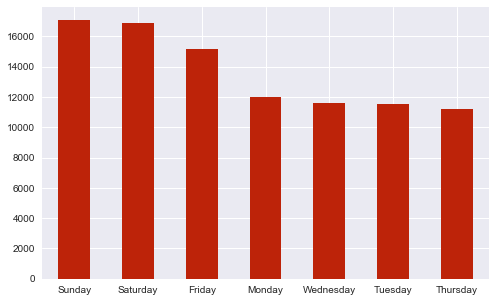

In [527]:
TripDf2['Weekday'].value_counts().plot(kind='bar', figsize=(8,5), rot=0, color = '#bd2309')

In [544]:
ProdByWeekDay = TripDf2.groupby(['Weekday']).TotProdts.sum().sort_values()

In [545]:
ProdByWeekDay

Weekday
Thursday      76253.0
Wednesday     79578.0
Tuesday       81598.0
Monday        93261.0
Friday       108040.0
Saturday     136330.0
Sunday       149270.0
Name: TotProdts, dtype: float64

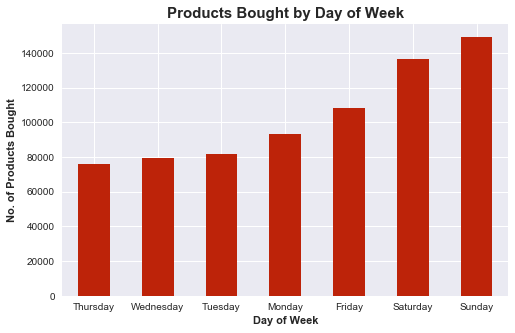

In [549]:
ProdByWeekDay.plot(kind='bar', figsize=(8,5), rot=0, color = '#bd2309')
plt.title('Products Bought by Day of Week',fontweight='bold',fontsize=15)
plt.ylabel('No. of Products Bought',fontweight='bold')
plt.xlabel("Day of Week", fontweight='bold')
plt.show()


In [554]:
AvgProdByWeekDay = TripDf2.groupby(['Weekday']).TotProdts.mean().sort_values()

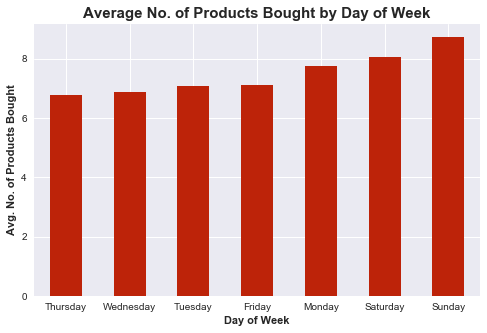

In [561]:
AvgProdByWeekDay.plot(kind='bar', figsize=(8,5), rot=0, color = '#bd2309')
plt.title('Average No. of Products Bought by Day of Week',fontweight='bold',fontsize=15)
plt.ylabel('Avg. No. of Products Bought',fontweight='bold')
plt.xlabel("Day of Week", fontweight='bold')
plt.show()

### Analysising Product Categories for top TripTypes

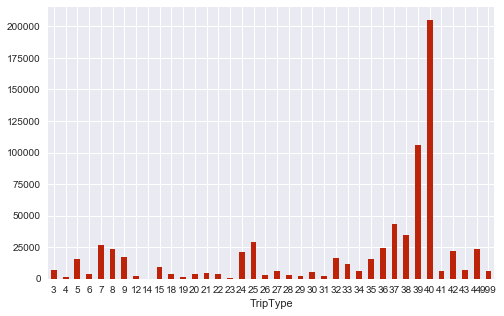

In [552]:
TripDf2.groupby(['TripType']).TotProdts.sum().plot(kind='bar', figsize=(8,5), rot=0, color = '#bd2309')

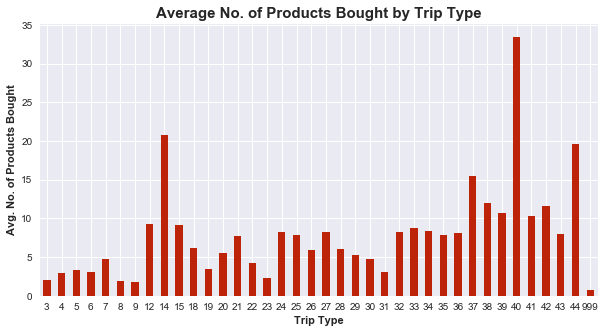

In [833]:
TripDf2.groupby(['TripType']).TotProdts.mean().plot(kind='bar', figsize=(10,5), rot=0, color = '#bd2309')
plt.title('Average No. of Products Bought by Trip Type',fontweight='bold',fontsize=15)
plt.ylabel('Avg. No. of Products Bought',fontweight='bold')
plt.xlabel("Trip Type", fontweight='bold')
plt.show()

In [562]:
AvgProdtTripType =TripDf2.groupby(['TripType']).TotProdts.mean().sort_values()

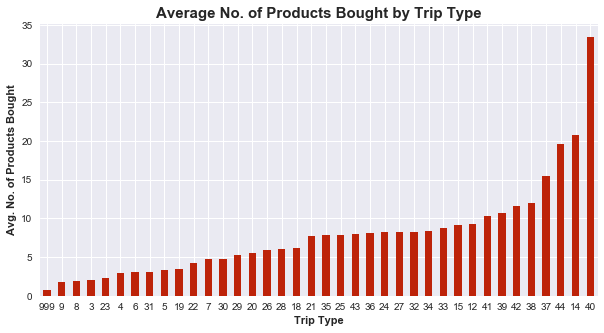

In [564]:
AvgProdtTripType.plot(kind='bar', figsize=(10,5), rot=0, color = '#bd2309')
plt.title('Average No. of Products Bought by Trip Type',fontweight='bold',fontsize=15)
plt.ylabel('Avg. No. of Products Bought',fontweight='bold')
plt.xlabel("Trip Type", fontweight='bold')
plt.show()

# Rough

In [355]:
TripDf2.loc[(TripDf2['TripType'] == 40) ].CatBought.value_counts()

10    902
9     862
8     803
11    726
7     616
12    554
13    385
6     364
14    258
5     197
15    127
4      84
16     83
17     51
3      37
18     30
19     16
2      14
20      9
1       5
21      4
23      1
22      1
25      1
Name: CatBought, dtype: int64

In [313]:
TripDf2[TripDf2.columns[10:78]].head()

,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",...,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [319]:
TripDf2[TripDf2.columns[10:78]].sum(axis=0).sort_values(ascending=False)[:40]

GROCERY DRY GOODS              88718.0
DSD GROCERY                    79814.0
PRODUCE                        52813.0
DAIRY                          50550.0
PERSONAL CARE                  44819.0
IMPULSE MERCHANDISE            31811.0
HOUSEHOLD CHEMICALS/SUPP       26915.0
PHARMACY OTC                   25620.0
FROZEN FOODS                   25368.0
HOUSEHOLD PAPER GOODS          17986.0
COMM BREAD                     17516.0
BEAUTY                         15077.0
INFANT CONSUMABLE HARDLINES    13149.0
PETS AND SUPPLIES              12592.0
CANDY, TOBACCO, COOKIES        11745.0
MENS WEAR                      11690.0
MEAT - FRESH & FROZEN          10882.0
SERVICE DELI                   10777.0
PRE PACKED DELI                10722.0
CELEBRATION                     9957.0
FINANCIAL SERVICES              8983.0
BAKERY                          8304.0
COOK AND DINE                   8102.0
OFFICE SUPPLIES                 7736.0
LADIESWEAR                      7351.0
HOME MANAGEMENT          

In [566]:
TripDf2[TripDf2.columns[10:78]].sum(axis=0).sort_values(ascending=False)[:40]

GROCERY DRY GOODS              88718.0
DSD GROCERY                    79814.0
PRODUCE                        52813.0
DAIRY                          50550.0
PERSONAL CARE                  44819.0
IMPULSE MERCHANDISE            31811.0
HOUSEHOLD CHEMICALS/SUPP       26915.0
PHARMACY OTC                   25620.0
FROZEN FOODS                   25368.0
HOUSEHOLD PAPER GOODS          17986.0
COMM BREAD                     17516.0
BEAUTY                         15077.0
INFANT CONSUMABLE HARDLINES    13149.0
PETS AND SUPPLIES              12592.0
CANDY, TOBACCO, COOKIES        11745.0
MENS WEAR                      11690.0
MEAT - FRESH & FROZEN          10882.0
SERVICE DELI                   10777.0
PRE PACKED DELI                10722.0
CELEBRATION                     9957.0
FINANCIAL SERVICES              8983.0
BAKERY                          8304.0
COOK AND DINE                   8102.0
OFFICE SUPPLIES                 7736.0
LADIESWEAR                      7351.0
HOME MANAGEMENT          

### Change TripType No. in the 3 cells below and get results for the type of categories bought 

In [364]:
DF39 = TripDf2.loc[(TripDf2['TripType'] == 39)]

In [365]:
DF39[DF39.columns[10:78]].sum(axis=0).sum()

106266.0

In [366]:
DF39[DF39.columns[10:78]].sum(axis=0).sort_values(ascending=False)[:40]

GROCERY DRY GOODS              15481.0
DSD GROCERY                    14828.0
PERSONAL CARE                   8595.0
DAIRY                           7568.0
PRODUCE                         6681.0
HOUSEHOLD CHEMICALS/SUPP        5504.0
PHARMACY OTC                    5059.0
FROZEN FOODS                    4806.0
IMPULSE MERCHANDISE             4644.0
HOUSEHOLD PAPER GOODS           3815.0
COMM BREAD                      2942.0
CANDY, TOBACCO, COOKIES         2783.0
BEAUTY                          2298.0
PETS AND SUPPLIES               1890.0
PRE PACKED DELI                 1682.0
SERVICE DELI                    1674.0
BAKERY                          1534.0
INFANT CONSUMABLE HARDLINES     1310.0
MEAT - FRESH & FROZEN           1018.0
LIQUOR,WINE,BEER                1001.0
COOK AND DINE                    813.0
MENS WEAR                        795.0
HOME MANAGEMENT                  674.0
CELEBRATION                      610.0
OFFICE SUPPLIES                  545.0
LAWN AND GARDEN          

In [359]:
DF3 = TripDf2.loc[(TripDf2['TripType'] == 3)]

In [351]:
DF5[DF5.columns[10:78]].sum(axis=0).sum()

15544.0

In [360]:
DF3[DF3.columns[10:78]].sum(axis=0).sort_values(ascending=False)[:40]

FINANCIAL SERVICES             5829.0
IMPULSE MERCHANDISE             801.0
LARGE HOUSEHOLD GOODS            76.0
DSD GROCERY                      56.0
PHARMACY OTC                     47.0
PERSONAL CARE                    41.0
MENS WEAR                        35.0
CANDY, TOBACCO, COOKIES          25.0
BEAUTY                           24.0
AUTOMOTIVE                       22.0
PRODUCE                          21.0
CELEBRATION                      17.0
SPORTING GOODS                   16.0
HOME MANAGEMENT                  16.0
ELECTRONICS                      14.0
SERVICE DELI                     13.0
GROCERY DRY GOODS                12.0
OFFICE SUPPLIES                  12.0
INFANT CONSUMABLE HARDLINES      11.0
DAIRY                            11.0
HARDWARE                         11.0
PETS AND SUPPLIES                11.0
MEDIA AND GAMING                 10.0
COOK AND DINE                    10.0
LIQUOR,WINE,BEER                 10.0
LAWN AND GARDEN                   9.0
BOYS WEAR   

In [333]:
DF9 = TripDf2.loc[(TripDf2['TripType'] == 9)]

In [334]:
DF9[DF9.columns[10:78]].sum(axis=0).sum()

16941.0

In [335]:
DF9[DF9.columns[10:78]].sum(axis=0).sort_values(ascending=False)[:40]

MENS WEAR                      1396.0
IMPULSE MERCHANDISE            1356.0
AUTOMOTIVE                      969.0
OFFICE SUPPLIES                 766.0
CELEBRATION                     740.0
SPORTING GOODS                  658.0
LADIESWEAR                      654.0
HARDWARE                        638.0
SHOES                           626.0
TOYS                            588.0
DSD GROCERY                     563.0
ELECTRONICS                     500.0
HOME MANAGEMENT                 496.0
LAWN AND GARDEN                 455.0
JEWELRY AND SUNGLASSES          451.0
COOK AND DINE                   404.0
FABRICS AND CRAFTS              358.0
PERSONAL CARE                   327.0
BOYS WEAR                       281.0
WIRELESS                        277.0
HOME DECOR                      274.0
MEDIA AND GAMING                238.0
HORTICULTURE AND ACCESS         222.0
PHARMACY OTC                    222.0
PAINT AND ACCESSORIES           221.0
BATH AND SHOWER                 216.0
INFANT CONSU

In [330]:
DF8 = TripDf2.loc[(TripDf2['TripType'] == 8)]

In [331]:
DF8[DF8.columns[10:78]].sum(axis=0).sum()

23483.0

In [332]:
DF8[DF8.columns[10:78]].sum(axis=0).sort_values(ascending=False)[:40]

DSD GROCERY                    5013.0
PERSONAL CARE                  2711.0
IMPULSE MERCHANDISE            2557.0
PRODUCE                        1977.0
DAIRY                          1892.0
GROCERY DRY GOODS              1647.0
BEAUTY                         1122.0
HOUSEHOLD CHEMICALS/SUPP       1019.0
HOUSEHOLD PAPER GOODS           717.0
PHARMACY OTC                    638.0
CANDY, TOBACCO, COOKIES         627.0
PETS AND SUPPLIES               565.0
COMM BREAD                      495.0
BAKERY                          488.0
FROZEN FOODS                    449.0
INFANT CONSUMABLE HARDLINES     398.0
SERVICE DELI                    208.0
CELEBRATION                      98.0
OFFICE SUPPLIES                  81.0
PRE PACKED DELI                  64.0
AUTOMOTIVE                       59.0
HOME MANAGEMENT                  55.0
HARDWARE                         46.0
LIQUOR,WINE,BEER                 46.0
SHOES                            46.0
COOK AND DINE                    44.0
FABRICS AND 

In [326]:
DF39 = TripDf2.loc[(TripDf2['TripType'] == 39)]

In [329]:
DF39[DF39.columns[10:78]].sum(axis=0).sum()

106266.0

In [327]:
DF39[DF39.columns[10:78]].sum(axis=0).sort_values(ascending=False)[:40]

GROCERY DRY GOODS              15481.0
DSD GROCERY                    14828.0
PERSONAL CARE                   8595.0
DAIRY                           7568.0
PRODUCE                         6681.0
HOUSEHOLD CHEMICALS/SUPP        5504.0
PHARMACY OTC                    5059.0
FROZEN FOODS                    4806.0
IMPULSE MERCHANDISE             4644.0
HOUSEHOLD PAPER GOODS           3815.0
COMM BREAD                      2942.0
CANDY, TOBACCO, COOKIES         2783.0
BEAUTY                          2298.0
PETS AND SUPPLIES               1890.0
PRE PACKED DELI                 1682.0
SERVICE DELI                    1674.0
BAKERY                          1534.0
INFANT CONSUMABLE HARDLINES     1310.0
MEAT - FRESH & FROZEN           1018.0
LIQUOR,WINE,BEER                1001.0
COOK AND DINE                    813.0
MENS WEAR                        795.0
HOME MANAGEMENT                  674.0
CELEBRATION                      610.0
OFFICE SUPPLIES                  545.0
LAWN AND GARDEN          

In [324]:
DF40 = TripDf2.loc[(TripDf2['TripType'] == 40)]

In [328]:
DF40[DF40.columns[10:78]].sum(axis=0).sum()

205114.0

In [325]:
DF40[DF40.columns[10:78]].sum(axis=0).sort_values(ascending=False)[:40]

GROCERY DRY GOODS              42450.0
DSD GROCERY                    26515.0
DAIRY                          20426.0
PRODUCE                        17417.0
FROZEN FOODS                   11398.0
PERSONAL CARE                  10936.0
HOUSEHOLD CHEMICALS/SUPP        8789.0
COMM BREAD                      6976.0
HOUSEHOLD PAPER GOODS           6300.0
PHARMACY OTC                    5218.0
PRE PACKED DELI                 4934.0
IMPULSE MERCHANDISE             4902.0
MEAT - FRESH & FROZEN           4084.0
PETS AND SUPPLIES               4009.0
CANDY, TOBACCO, COOKIES         3400.0
BEAUTY                          2862.0
INFANT CONSUMABLE HARDLINES     2553.0
SERVICE DELI                    2171.0
BAKERY                          1990.0
COOK AND DINE                   1563.0
LIQUOR,WINE,BEER                1099.0
CELEBRATION                      992.0
SEAFOOD                          945.0
HOME MANAGEMENT                  933.0
LAWN AND GARDEN                  842.0
OFFICE SUPPLIES          

#### Making a column for weekend shopping i.e. for Fri,Sat & Sun

In [273]:
TripDf2['Weekend']=np.where((TripDf2['Saturday']==1.0) | (TripDf2['Sunday']==1.0)| (TripDf2['Friday']==1.0), 1.0, 0.0)

In [274]:
TripDf2.loc[(TripDf2['Weekend'] == 1.0) ].TripType.value_counts()

8      5917
39     5107
9      5031
999    4036
40     3555
7      2620
5      2072
25     2054
3      1867
36     1573
37     1464
38     1394
       ... 
41      353
20      340
31      330
21      282
28      273
26      256
29      249
19      194
12      191
4       170
23       94
14        3
Name: TripType, Length: 38, dtype: int64

In [275]:
TripDf2.loc[(TripDf2['Saturday'] == 1.0) | (TripDf2['Sunday'] == 1.0 )| (TripDf2['Friday'] == 1.0 )].TripType.value_counts()

8      5917
39     5107
9      5031
999    4036
40     3555
7      2620
5      2072
25     2054
3      1867
36     1573
37     1464
38     1394
       ... 
41      353
20      340
31      330
21      282
28      273
26      256
29      249
19      194
12      191
4       170
23       94
14        3
Name: TripType, Length: 38, dtype: int64

## Adding Slabs for  No. of products bought together 

Slab1: 1 to 4   
Slab2: 5 to 9  
Slab3: >10


In [567]:
TripDf2['Slab1'] =0
TripDf2['Slab2'] =0
TripDf2['Slab3'] =0
TripDf2['Slab'] =0

In [570]:
TripDf2.columns[92]

'Slab'

In [573]:
for index, row in TripDf2.iterrows():
    count = 0
    for col in row[10:78]:
        if col > 0:
            count += col
    if count >= 1 and count <=4:
        TripDf2.iloc[index, 83] = count
    if count >= 5 and count <=9:
        TripDf2.iloc[index, 84] = count
    if count >= 10:
        TripDf2.iloc[index, 85] = count

In [571]:
for index, row in TripDf2.iterrows():
    count = 0
    for col in row[10:78]:
        if col > 0:
            count += col
    if count >= 1 and count <=4:
        TripDf2.iloc[index, 92] = 1
    if count >= 5 and count <=9:
        TripDf2.iloc[index, 92] = 2
    if count >= 10:
        TripDf2.iloc[index, 92] = 3

In [574]:
TripDf2.head()

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,1-HR PHOTO,ACCESSORIES,...,NoTrans,Weekend,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems,Slab
0,999,5,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,30,7,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2,26,8,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,0.0,0.0,27.0,3.0,1.0,0.0,1.0,0.0,0.0,3
3,8,9,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1
4,8,10,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1


### Creating Category Groups that are usually bought together or feature together in a TripTypes

#### 1.Core Food items

In [389]:
TripDf2['CoreFood'] = 0

In [390]:
TripDf2['CoreFood']=np.where((TripDf2['Return']!=1.0) ,\
                             (TripDf2['GROCERY DRY GOODS'] +\
                              TripDf2['DSD GROCERY'] +\
                              TripDf2['DAIRY']+\
                              TripDf2['PRODUCE']+\
                              TripDf2['FROZEN FOODS'] +\
                              TripDf2['COMM BREAD']), 0.0)


In [391]:
TripDf2.head()

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,1-HR PHOTO,ACCESSORIES,...,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,TotProdts,CatBought,Return,NoTrans,Weekend,Slab1,Slab2,Slab3,CoreFood
0,999,5,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,1.0,0.0,0.0,0.0,0.0
1,30,7,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2,0,0,1.0,2.0,0.0,0.0,0.0
2,26,8,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,27.0,6,0,0,1.0,0.0,0.0,27.0,3.0
3,8,9,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,2,0,0,1.0,3.0,0.0,0.0,2.0
4,8,10,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,2,0,0,1.0,3.0,0.0,0.0,2.0


### 2. Non Core Food Items

In [392]:
TripDf2['NonCoreFood'] = 0

In [393]:
TripDf2['NonCoreFood']=np.where((TripDf2['Return']!=1.0) ,\
                             (TripDf2['MEAT - FRESH & FROZEN'] +\
                              TripDf2['CANDY, TOBACCO, COOKIES'] +\
                              TripDf2['BAKERY']+\
                              TripDf2['PRE PACKED DELI']+\
                              TripDf2['COOK AND DINE']+\
                              TripDf2['LIQUOR,WINE,BEER'] +\
                              TripDf2['SEAFOOD']), 0.0)



### 3. Pharma

In [394]:
TripDf2['Pharma'] = 0

In [395]:
TripDf2['Pharma']=np.where((TripDf2['Return']!=1.0) ,\
                             (TripDf2['PHARMACY OTC'] +\
                              TripDf2['PHARMACY RX']), 0.0)


#### 4. Home Care

In [396]:
TripDf2['HomeCare'] = 0

In [397]:
TripDf2['HomeCare']=np.where((TripDf2['Return']!=1.0) ,\
                             (TripDf2['HOUSEHOLD CHEMICALS/SUPP'] +\
                              TripDf2['HOUSEHOLD PAPER GOODS']), 0.0)



#### 5.Clothing/Shoes

In [398]:
TripDf2['Clothing/Shoes'] = 0

In [400]:
TripDf2['Clothing/Shoes']=np.where((TripDf2['Return']!=1.0) ,\
                             (TripDf2['MENS WEAR'] +\
                              TripDf2['LADIESWEAR'] +\
                              TripDf2['GIRLS WEAR, 4-6X  AND 7-14']+\
                              TripDf2['BOYS WEAR']+\
                              TripDf2['SLEEPWEAR/FOUNDATIONS']+\
                              TripDf2['BRAS & SHAPEWEAR'] +\
                              TripDf2['SHOES'] +\
                              TripDf2['SWIMWEAR/OUTERWEAR'] +\
                              TripDf2['INFANT APPAREL'] +\
                              TripDf2['PLUS AND MATERNITY'] +\
                              TripDf2['LADIES SOCKS'] +\
                              TripDf2['FABRICS AND CRAFTS'] +\
                              TripDf2['MENSWEAR']), 0.0)



#### 6.Personal Items

In [402]:
TripDf2['PersonalItems'] = 0

In [403]:
TripDf2['PersonalItems']=np.where((TripDf2['Return']!=1.0) ,\
                             (TripDf2['IMPULSE MERCHANDISE'] +\
                              TripDf2['PERSONAL CARE'] +\
                              TripDf2['BEAUTY']), 0.0)



In [466]:
TripDf2.head()

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,1-HR PHOTO,ACCESSORIES,...,Return,NoTrans,Weekend,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems
0,999,5,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,7,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,26,8,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,0.0,0.0,27.0,3.0,1.0,0.0,1.0,0.0,0.0
3,8,9,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
4,8,10,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0


In [828]:
TripDf2.groupby(['TripType','Slab']).Slab.count()

TripType  Slab
3         1        3590
          2          43
          3          10
4         1         281
          2          53
          3          12
5         1        3588
          2         763
          3         242
6         1        1056
          2         168
          3          53
7         1        3555
          2        1470
          3         727
8         0           1
          1       12093
          2          65
          3           2
9         1        9426
                  ...  
39        3        5518
40        1           4
          2          17
          3        6109
41        1          81
          2         265
          3         237
42        1         235
          2         727
          3         896
43        1          86
          2         565
          3         221
44        1           7
          2         128
          3        1052
999       0        5577
          1        2447
          2         205
          3          57
N

In [649]:
DF26 = TripDf2.loc[(TripDf2['TripType'] == 26)]

In [578]:
DF8.head()

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,1-HR PHOTO,ACCESSORIES,...,NoTrans,Weekend,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems,Slab
3,8,9,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1
4,8,10,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1
12,8,25,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
15,8,29,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
17,8,31,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1


In [775]:
DF5 = TripDf2.loc[(TripDf2['TripType'] == 5)]

In [772]:
#total no. of products in this dataset bought during trip type 8
DF3[DF3.columns[10:78]].sum(axis=0).sum()

7279.0

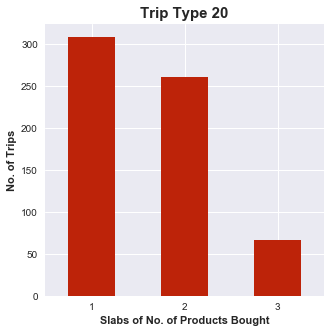

In [841]:
# Grouping Trip Type 8 by slabs where each trip falls and it seems majority of it is in slab 1
DF20.groupby(['Slab']).Slab.count().plot(kind='bar', figsize=(5,5), rot=0, color = '#bd2309')
#AvgProdtTripType.plot(kind='bar', figsize=(10,5), rot=0, color = '#bd2309')
plt.title('Trip Type 20',fontweight='bold',fontsize=15)
plt.ylabel('No. of Trips',fontweight='bold')
plt.xlabel("Slabs of No. of Products Bought", fontweight='bold')
plt.show()

In [762]:
DF8.groupby(['Slab']).count().apply(lambda x: x / x.sum()*100)  # Percentage of trip type 8 falls in different slabs


,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,1-HR PHOTO,ACCESSORIES,...,Return,NoTrans,Weekend,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems
Slab,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,...,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008
1,99.441,99.441,99.441,99.441,99.441,99.441,99.441,99.441,99.441,99.441,99.441,99.441,...,99.441,99.441,99.441,99.441,99.441,99.441,99.441,99.441,99.441,99.441,99.441,99.441
2,0.534,0.534,0.534,0.534,0.534,0.534,0.534,0.534,0.534,0.534,0.534,0.534,...,0.534,0.534,0.534,0.534,0.534,0.534,0.534,0.534,0.534,0.534,0.534,0.534
3,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,...,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016


In [800]:
DF18 = TripDf2.loc[(TripDf2['TripType'] ==18)]

In [822]:
# During trip type 8, sum of prodts bought from each Category
DF44[DF44.columns[10:78]].sum(axis=0).sort_values(ascending=False)[:40]

PERSONAL CARE                  2091.0
DSD GROCERY                    1580.0
GROCERY DRY GOODS              1246.0
PHARMACY OTC                   1021.0
IMPULSE MERCHANDISE            1008.0
HOUSEHOLD CHEMICALS/SUPP        990.0
BEAUTY                          909.0
DAIRY                           806.0
CELEBRATION                     752.0
PRODUCE                         710.0
OFFICE SUPPLIES                 603.0
COOK AND DINE                   589.0
MENS WEAR                       588.0
HOUSEHOLD PAPER GOODS           576.0
PETS AND SUPPLIES               526.0
FABRICS AND CRAFTS              476.0
LADIESWEAR                      469.0
GIRLS WEAR, 4-6X  AND 7-14      468.0
INFANT APPAREL                  464.0
HOME MANAGEMENT                 451.0
FROZEN FOODS                    442.0
SHOES                           427.0
BATH AND SHOWER                 409.0
LAWN AND GARDEN                 402.0
TOYS                            366.0
INFANT CONSUMABLE HARDLINES     362.0
CANDY, TOBAC

In [ ]:
TripDf2['Weekday'].value_counts().plot(kind='bar', figsize=(8,5), rot=0, color = '#bd2309')


CountCat.head()

In [407]:
with open('../Data/TripFeatureDf.pkl', 'wb') as picklefile3:
    pickle.dump(TripDf2, picklefile3)

In [408]:
!ls ../Data/

Cat Analysis.xlsx     TripFeatureDf.pkl     test.csv
FullTripDf.pkl        TripFullDf.pkl        train.csv
TripDf.pkl            sample_submission.csv ~$Cat Analysis.xlsx


## Balancing Clasess  - resampling, adding features and dropping classes
### Drop classes with sample less than 500

In [409]:
with open("../Data/TripFeatureDf.pkl", 'rb') as picklefile3: 
    TripDf2 = pickle.load(picklefile3)

In [411]:
TripDf2.head()

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,1-HR PHOTO,ACCESSORIES,...,Return,NoTrans,Weekend,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems
0,999,5,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,7,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,26,8,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,0.0,0.0,27.0,3.0,1.0,0.0,1.0,0.0,0.0
3,8,9,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
4,8,10,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0


In [412]:
TripDf2.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Sunday', 'Saturday', 'Friday',
       'Thursday', 'Wednesday', 'Tuesday', 'Monday', '1-HR PHOTO',
       'ACCESSORIES', 'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY',
       'BEDDING', 'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - F

In [413]:
TripBal = TripDf2.filter(['TripType', 'VisitNumber', 'Weekday', 'Sunday', 'Saturday', 'Friday',
       'Thursday', 'Wednesday', 'Tuesday', 'Monday', '1-HR PHOTO',
       'ACCESSORIES', 'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY',
       'BEDDING', 'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
       'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
       'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
       'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
       'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
       'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
       'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS', 'TotProdts', 'CatBought',
       'Return', 'NoTrans', 'Weekend', 'Slab1', 'Slab2', 'Slab3', 'CoreFood',
       'NonCoreFood', 'Pharma', 'HomeCare', 'Clothing/Shoes', 'PersonalItems'])

In [416]:
TripBal.head()

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,1-HR PHOTO,ACCESSORIES,...,Return,NoTrans,Weekend,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems
0,999,5,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,7,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,26,8,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,0.0,0.0,27.0,3.0,1.0,0.0,1.0,0.0,0.0
3,8,9,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
4,8,10,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0


In [417]:
from sklearn.utils import resample

In [421]:
TripBal.TripType.value_counts()

8      12161
39      9896
9       9464
999     8286
40      6130
7       5752
5       4593
25      3698
3       3643
36      3005
38      2912
37      2788
24      2609
35      2030
32      1984
42      1858
33      1315
6       1277
44      1187
30      1081
15       978
22       928
43       872
27       785
34       719
21       641
20       637
31       594
41       583
18       549
26       503
28       492
29       433
19       375
4        346
12       269
23       139
14         4
Name: TripType, dtype: int64

In [434]:
#No. of classes /labels
TripBal.TripType.nunique()

38

In [439]:
# Total No. of samples in DataFrame
TripBal.TripType.count()

95516

In [442]:
# Average sample size of each Class/Label

avgSample = 95516/38
avgSample

2513.5789473684213

#### Drop classes with samples less than 500

In [443]:
TripBal = TripBal[TripBal.TripType != 28]
TripBal = TripBal[TripBal.TripType != 29]
TripBal = TripBal[TripBal.TripType != 19]
TripBal = TripBal[TripBal.TripType != 4]
TripBal = TripBal[TripBal.TripType != 12]
TripBal = TripBal[TripBal.TripType != 23]
TripBal = TripBal[TripBal.TripType != 14] 

### Lets take median sample size of the classes/labels --- Use this value to upsample/downsample ~ 1800

In [450]:
median(list(TripBal.TripType.value_counts()))

1858.0

In [445]:
TripBal.TripType.nunique()

31

In [446]:
TripBal.TripType.count()

93458

In [465]:
TripBal.loc[(TripBal['TripType']== 999)].count()

TripType                 8286
VisitNumber              8286
Weekday                  8286
Sunday                   8286
Saturday                 8286
Friday                   8286
Thursday                 8286
Wednesday                8286
Tuesday                  8286
Monday                   8286
1-HR PHOTO               8286
ACCESSORIES              8286
AUTOMOTIVE               8286
BAKERY                   8286
BATH AND SHOWER          8286
BEAUTY                   8286
BEDDING                  8286
BOOKS AND MAGAZINES      8286
BOYS WEAR                8286
BRAS & SHAPEWEAR         8286
                         ... 
SHOES                    8286
SLEEPWEAR/FOUNDATIONS    8286
SPORTING GOODS           8286
SWIMWEAR/OUTERWEAR       8286
TOYS                     8286
WIRELESS                 8286
TotProdts                8286
CatBought                8286
Return                   8286
NoTrans                  8286
Weekend                  8286
Slab1                    8286
Slab2     

In [ ]:
TripDf2.loc[(TripDf2['Saturday'] == 1.0) | (TripDf2['Sunday'] == 1.0 )| (TripDf2['Friday'] == 1.0 )].TripType.value_counts()

In [462]:
listTripType = list(TripBal['TripType'].unique())

In [467]:
TripBal.loc[(TripBal['TripType']== 999)]

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,1-HR PHOTO,ACCESSORIES,...,Return,NoTrans,Weekend,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems
0,999,5,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,999,133,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,999,182,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,999,190,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,999,207,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
122,999,253,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,999,261,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,999,281,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,999,295,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,999,317,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [468]:
TripBal.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Sunday', 'Saturday', 'Friday',
       'Thursday', 'Wednesday', 'Tuesday', 'Monday', '1-HR PHOTO',
       'ACCESSORIES', 'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY',
       'BEDDING', 'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - F

In [507]:
#### Creating an empty DF with only 2rows of data....this DF will be concatenated with balanced classes from each class
Df_Bal = TripBal.iloc[:2,:]

In [508]:
Df_Bal

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,1-HR PHOTO,ACCESSORIES,...,Return,NoTrans,Weekend,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems
0,999,5,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,7,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [509]:
# if sample less than 1800  then upsample with replacement else downnsample without replacement

for i in listTripType:
    if (TripBal.loc[(TripBal['TripType']== i)].TripType.count()) > 1800:
        DF_i = resample(TripBal.loc[(TripBal['TripType']== i)],replace=False, n_samples=1800, random_state=42)
    else:
        DF_i = resample(TripBal.loc[(TripBal['TripType']== i)],replace=True, n_samples=1800, random_state=42)
    Df_Bal = pd.concat([Df_Bal, DF_i])

        

In [510]:
Df_Bal.reset_index(drop=True, inplace=True)

In [481]:
del Df_Bal['Index']

KeyError: 'Index'

In [511]:
Df_Bal.head()

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,1-HR PHOTO,ACCESSORIES,...,Return,NoTrans,Weekend,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems
0,999,5,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,7,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,999,140278,Saturday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,999,19528,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
4,999,102008,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [483]:
Df_Bal.drop(Df_Bal.columns[0], axis=1, inplace=True)

In [502]:
Df_Bal.head()

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,1-HR PHOTO,ACCESSORIES,...,Return,NoTrans,Weekend,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems
0,999,140278,Saturday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,999,19528,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
2,999,102008,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,999,48082,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,999,165900,Wednesday,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [512]:
Df_Bal.TripType.value_counts()

999    1801
30     1801
31     1800
40     1800
33     1800
34     1800
3      1800
35     1800
36     1800
5      1800
37     1800
6      1800
38     1800
7      1800
39     1800
8      1800
9      1800
41     1800
42     1800
43     1800
44     1800
15     1800
18     1800
20     1800
21     1800
22     1800
24     1800
25     1800
26     1800
27     1800
32     1800
Name: TripType, dtype: int64

In [513]:
# Deleting the 1st 2 extra rows that were used to create the DF initially
Df_Bal =Df_Bal.iloc[2:,]

In [460]:
TripBal.loc[(TripBal['TripType']== 8)].TripType.count()

12161

In [514]:
Df_Bal.TripType.value_counts()

31     1800
40     1800
33     1800
34     1800
3      1800
35     1800
36     1800
5      1800
37     1800
6      1800
38     1800
7      1800
39     1800
999    1800
8      1800
9      1800
30     1800
41     1800
42     1800
43     1800
44     1800
15     1800
18     1800
20     1800
21     1800
22     1800
24     1800
25     1800
26     1800
27     1800
32     1800
Name: TripType, dtype: int64

In [517]:
Df_Bal.TripType.nunique()

31

In [515]:
with open('../Data/BalncedDf.pkl', 'wb') as picklefile4:
    pickle.dump(Df_Bal, picklefile4)

In [516]:
!ls ../Data

BalncedDf.pkl         TripDf.pkl            test.csv
Cat Analysis.xlsx     TripFeatureDf.pkl     train.csv
FullTripDf.pkl        TripFullDf.pkl        ~$Cat Analysis.xlsx
SmallBalDf.pkl        sample_submission.csv


## Useful Notes

### Select rows based on 2 conditions

In [ ]:
df.loc[(df['FinelineNumber'].isnull()) | (df['Upc'].isnull()), :]